# Kickstarter Projects
## Can you predict which Kickstarter Project was successful?
https://www.kaggle.com/datasets/ulrikthygepedersen/kickstarter-projects/data

In [1]:
# libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('data/kickstarter_projects.csv')

In [3]:
df.head(10)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
5,2089078683,New York Makes a Book!!,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful
6,830477146,Web Site for Short Horror Film,Film & Video,Shorts,United States,2009-04-29 02:04:21,2009-05-29,200,41,3,Failed
7,266044220,Help me write my second novel.,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,Successful
8,1502297238,Produce a Play (Canceled),Theater,Theater,United States,2009-04-29 04:37:37,2009-06-01,500,0,0,Canceled
9,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Music,Rock,United States,2009-04-29 05:26:32,2009-05-16,300,15,2,Failed


In [4]:
df.tail(10)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
374843,163752222,Printable Tabletop Terrain for Ancient Rome,Games,Tabletop Games,Germany,2018-01-02 12:45:34,2018-02-01,364,1505,31,Live
374844,272668251,Forge In YOUR OWN Fire,Crafts,Crafts,United States,2018-01-02 13:02:29,2018-01-20,10000,286,1,Live
374845,80324970,"T.P.Customs, traditionally Handcrafted guitars",Crafts,Woodworking,United Kingdom,2018-01-02 13:11:02,2018-02-01,6820,0,0,Live
374846,473911584,A New Miss Eaves EP (& Videos),Music,Hip-Hop,United States,2018-01-02 14:04:11,2018-02-01,7500,128,3,Live
374847,150815475,Carl Sagan Quote Prints,Design,Graphic Design,United Kingdom,2018-01-02 14:07:02,2018-02-01,341,55,2,Live
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live
374852,1339173863,Spirits of the Forest,Games,Tabletop Games,Spain,2018-01-02 15:02:31,2018-01-26,24274,4483,82,Live


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [6]:
df.isna().sum()

ID             0
Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

In [7]:
df.describe()

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


In [8]:
df['State'].unique()

array(['Failed', 'Successful', 'Canceled', 'Suspended', 'Live'],
      dtype=object)

In [9]:
df['Category'].unique()

array(['Fashion', 'Film & Video', 'Art', 'Technology', 'Journalism',
       'Publishing', 'Theater', 'Music', 'Photography', 'Games', 'Design',
       'Food', 'Crafts', 'Comics', 'Dance'], dtype=object)

In [10]:
df['Category'].value_counts()

Category
Film & Video    62694
Music           49529
Publishing      39378
Games           35225
Technology      32562
Design          30065
Art             28151
Food            24599
Fashion         22812
Theater         10911
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: count, dtype: int64

In [11]:
df['Subcategory'].value_counts()

Subcategory
Product Design     22310
Documentary        16138
Tabletop Games     14178
Music              13339
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: count, Length: 159, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

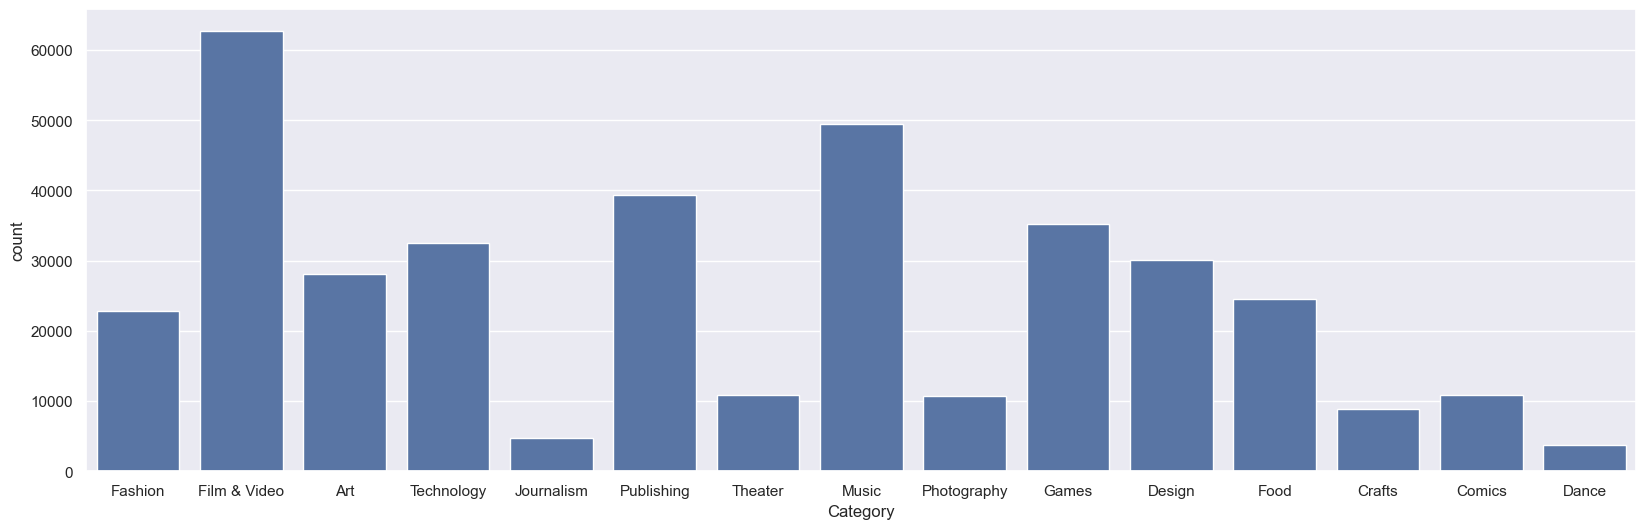

In [12]:
sns.set_theme(rc={'figure.figsize':(20,6)})
sns.countplot(df, x='Category')

(array([22812., 62694., 28151., 32562.,  4754., 39378., 10911., 49529.,
        10778., 35225., 30065., 24599.,  8809., 10819.,  3767.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        ]),
 <BarContainer object of 15 artists>)

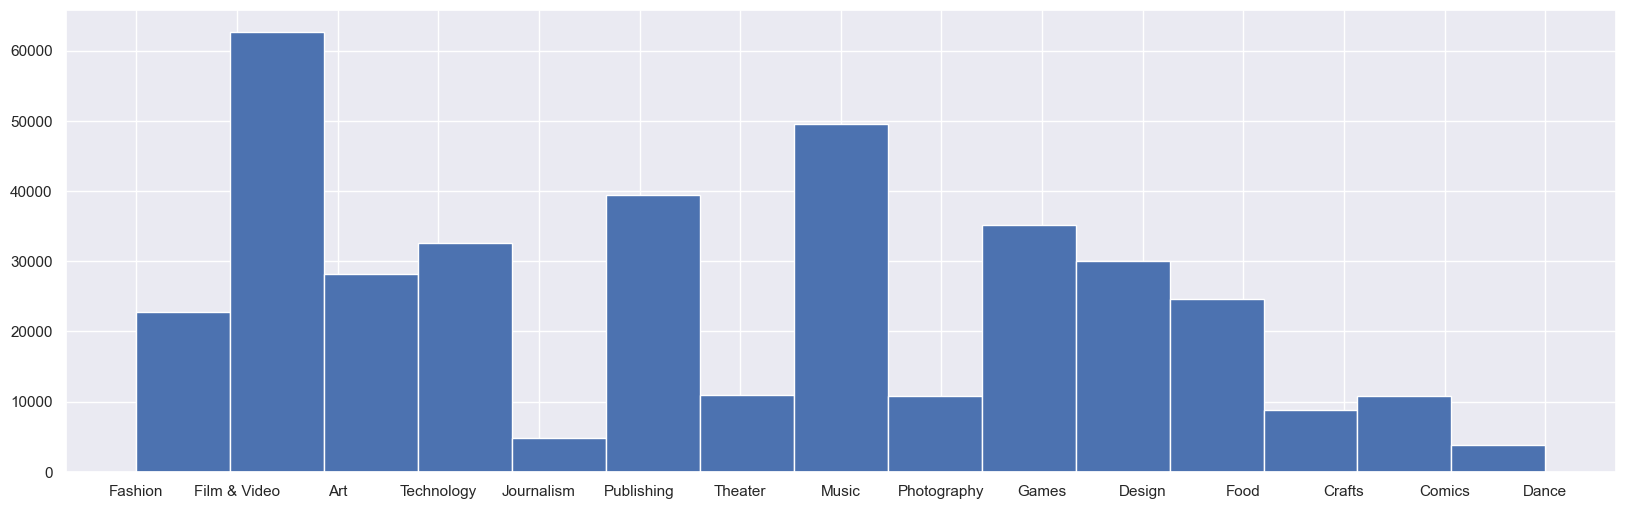

In [13]:
plt.figure(figsize=(20,6))
plt.hist(df['Category'], bins=len(df['Category'].unique()))

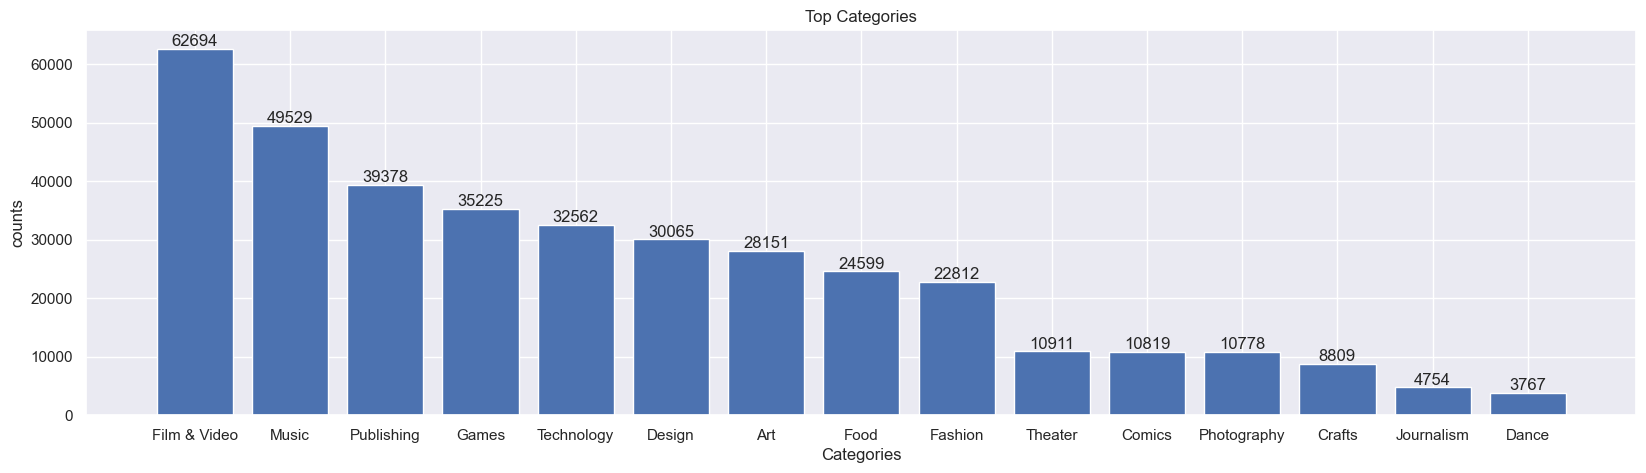

In [14]:
# show values on histogram

category_count = df['Category'].value_counts()

plt.figure(figsize=(20,5))
bars = plt.bar(category_count.index, category_count.values)

plt.ylabel('counts')
plt.xlabel('Categories')
plt.title('Top Categories')

plt.bar_label(bars)
plt.show()

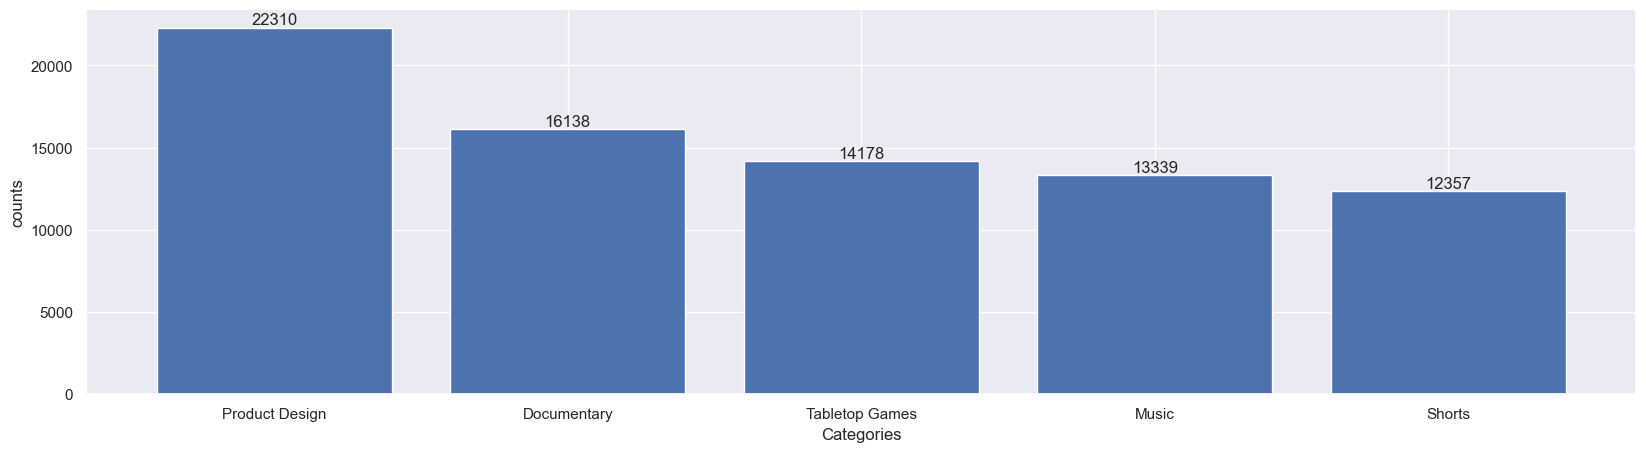

In [15]:
# show values on histogram of subcategory

category_count = df['Subcategory'].value_counts().nlargest(5) # top 5

plt.figure(figsize=(20,5))
bars = plt.bar(category_count.index, category_count.values)

plt.ylabel('counts')
plt.xlabel('Categories')

plt.bar_label(bars)
plt.show()

In [16]:
df[df['Name'].duplicated()]['Name']

6252                                     NIJINSKY IN ASYLUM
11959                                        MATTE Magazine
13004                                   The Busking Project
14428                                     The Fears Project
15562                                                  Spin
                                ...                        
374625                                           Short Film
374669    PerfectCombination: Help Us Turn The Dating Wo...
374672                                             Solstice
374755                                    100 Little Loaves
374814                                        Peace of Mind
Name: Name, Length: 2792, dtype: object

In [17]:
df['Name'].nunique()

372061

In [18]:
df[df['Name'] == 'NIJINSKY IN ASYLUM']

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
5146,338416508,NIJINSKY IN ASYLUM,Art,Performance Art,United States,2010-07-04 17:18:41,2010-07-20,2000,2000,9,Successful
6252,1705926108,NIJINSKY IN ASYLUM,Theater,Theater,United States,2010-08-04 07:04:52,2010-09-01,2000,2021,46,Successful


In [19]:
df[df['Name'] == '100 Little Loaves']

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
373719,552710479,100 Little Loaves,Art,Art,United States,2017-12-15 23:26:27,2018-01-14,12500,850,9,Canceled
374755,1812821305,100 Little Loaves,Art,Sculpture,United States,2018-01-01 07:24:18,2018-01-31,1000,745,6,Live


In [20]:
df['Deadline'].min()

'2009-05-03'

In [21]:
df['Launched'].min()

'2009-04-21 21:02:48'

## Changes
Data Types:
- Launched & Deadline: String -> Date ✅
- 'Suspended' = 'Failed' ✅ 
- 'Canceled' = 'Failed' ✅

In [22]:
# duration between dates
df['Deadline'] = pd.to_datetime(df['Deadline'])
df['Launched'] = pd.to_datetime(df['Launched'])
df['durations_days'] = (df['Deadline'] - df['Launched']).dt.days

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              374853 non-null  int64         
 1   Name            374853 non-null  object        
 2   Category        374853 non-null  object        
 3   Subcategory     374853 non-null  object        
 4   Country         374853 non-null  object        
 5   Launched        374853 non-null  datetime64[ns]
 6   Deadline        374853 non-null  datetime64[ns]
 7   Goal            374853 non-null  int64         
 8   Pledged         374853 non-null  int64         
 9   Backers         374853 non-null  int64         
 10  State           374853 non-null  object        
 11  durations_days  374853 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 34.3+ MB


In [24]:
# check the launched, deadline and duration: days exclude the first day of launched
df.iloc[:,[5,6,-1]] 

,Launched,Deadline,durations_days
0,2009-04-21 21:02:48,2009-05-31,39
1,2009-04-23 00:07:53,2009-07-20,87
2,2009-04-24 21:52:03,2009-05-03,8
3,2009-04-25 17:36:21,2009-07-14,79
4,2009-04-27 14:10:39,2009-05-26,28
...,...,...,...
374848,2018-01-02 14:13:09,2018-01-16,13
374849,2018-01-02 14:15:38,2018-02-09,37
374850,2018-01-02 14:17:46,2018-01-16,13
374851,2018-01-02 14:38:17,2018-02-01,29


In [25]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
ID,374853.0,1074656448.239619,5971.0,538072804.0,1075299658.0,1610148624.0,2147476221.0,619137746.780425
Launched,374853,2014-09-26 12:22:30.728664320,2009-04-21 21:02:48,2013-04-30 22:06:24,2014-12-02 19:02:35,2016-03-29 19:50:49,2018-01-02 15:02:31,NaN
Deadline,374853,2014-10-30 04:00:35.149778944,2009-05-03 00:00:00,2013-06-01 00:00:00,2015-01-06 00:00:00,2016-05-01 00:00:00,2018-03-03 00:00:00,NaN
Goal,374853.0,45863.784796,0.0,2000.0,5500.0,16000.0,166361391.0,1158778.178742
Pledged,374853.0,9121.072719,0.0,31.0,625.0,4051.0,20338986.0,91320.539385
Backers,374853.0,106.690359,0.0,2.0,12.0,57.0,219382.0,911.71852
durations_days,374853.0,33.217192,0.0,29.0,29.0,36.0,91.0,12.804795


In [26]:
df[['Goal', 'Pledged', 'Backers','durations_days']].corr().round(3).style.background_gradient(cmap='coolwarm')

,Goal,Pledged,Backers,durations_days
Goal,1.000000,0.006000,0.004000,0.022000
Pledged,0.006000,1.000000,0.753000,0.007000
Backers,0.004000,0.753000,1.000000,-0.002000
durations_days,0.022000,0.007000,-0.002000,1.000000


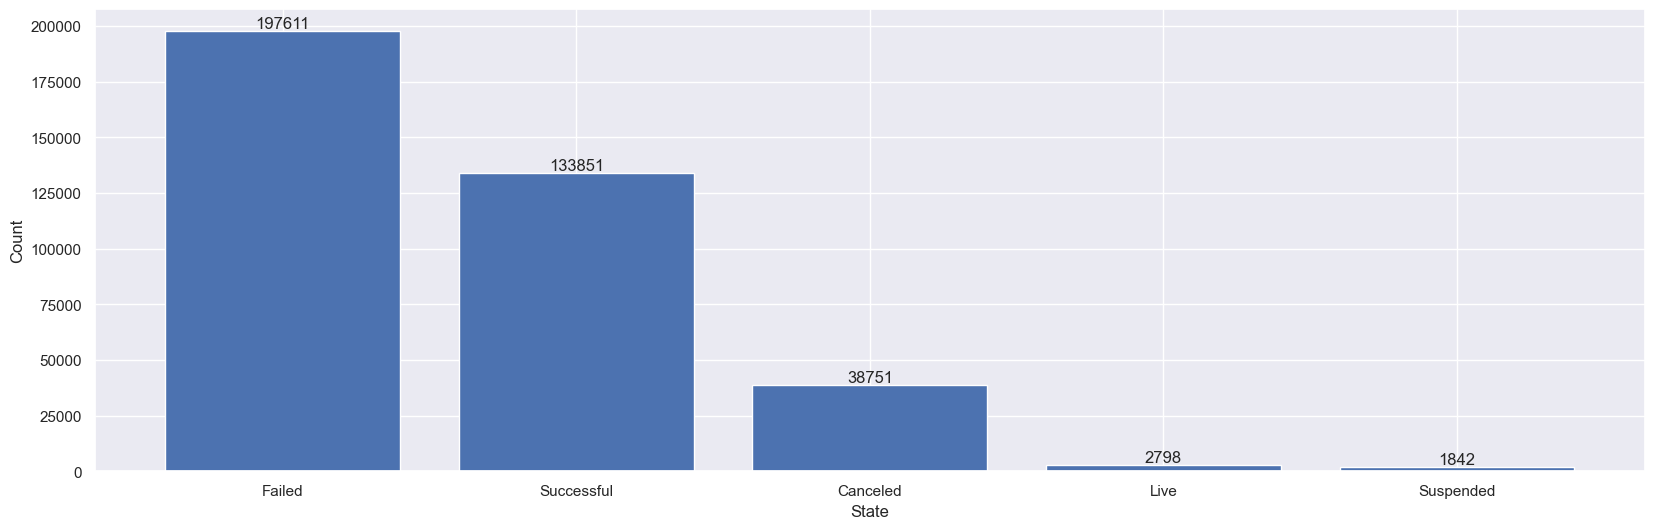

In [27]:
state_count = df['State'].value_counts()

bars = plt.bar(state_count.index, state_count.values)
plt.ylabel('Count')
plt.xlabel('State')
plt.bar_label(bars)

plt.show()

In [28]:
# Hypotheses: if Goal is bigger or equal than Pledged then it's 'Failed'
df[(df['State'] == 'Failed') & (df['Goal'] >= df['Pledged'])]

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,39
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,87
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,28
6,830477146,Web Site for Short Horror Film,Film & Video,Shorts,United States,2009-04-29 02:04:21,2009-05-29,200,41,3,Failed,29
9,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Music,Rock,United States,2009-04-29 05:26:32,2009-05-16,300,15,2,Failed,16
...,...,...,...,...,...,...,...,...,...,...,...,...
373944,1705137357,Center Touching Center - A Book of Poetry,Publishing,Publishing,United States,2017-12-19 04:10:24,2017-12-28,3700,0,0,Failed,8
374004,1100181726,Savage in Limbo,Theater,Theater,Canada,2017-12-19 18:18:45,2018-01-01,2398,160,2,Failed,12
374048,1924831776,No Fix?,Film & Video,Documentary,United States,2017-12-20 03:14:24,2018-01-01,20000,0,0,Failed,11
374049,201146560,No Label In Home Studio - The Future of Music,Music,Music,United States,2017-12-20 03:19:03,2017-12-31,3500,0,0,Failed,10


In [29]:
# check the Hypotheses the other way
df[(df['State'] == 'Failed') & (df['Goal'] <= df['Pledged'])]

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days
2295,2103203254,The new face of Canadian Science Fiction,Publishing,Fiction,United States,2010-03-18 04:35:31,2010-05-16,10000,10797,66,Failed,58
5754,1695255515,"POPE! an epic musical, opening at NY Fringe Fe...",Theater,Theater,United States,2010-07-21 05:48:11,2010-08-20,3600,3600,30,Failed,29
25983,790638930,From Neurons to Nirvana: The Great Medicines,Film & Video,Documentary,United States,2011-07-25 20:35:41,2011-09-23,40000,40000,113,Failed,59
33823,1297794474,Music Empowers - A Day with the Accende Ensemble,Music,Classical Music,United States,2011-11-07 15:20:24,2012-01-04,3000,3088,20,Failed,57
40294,9572984,Nana,Film & Video,Shorts,United States,2012-01-25 07:23:19,2012-03-16,0,0,0,Failed,50
62467,416370896,Tye Gazoo,Music,Country & Folk,United States,2012-07-20 22:15:08,2012-08-11,3000,3000,24,Failed,21
86441,1085047405,"""Balance""",Music,Jazz,United States,2013-03-05 10:55:56,2013-04-04,23000,23020,141,Failed,29
108392,59246799,Key Wrench - Unlock Your Life!,Design,Product Design,United States,2013-08-24 05:42:10,2013-10-04,6000,6183,208,Failed,40
151769,1257771766,Egg Salad,Food,Food,United States,2014-07-08 23:23:48,2014-08-07,10,10,1,Failed,29
259754,818363688,The 5th Annual 90 Square Arts Festival,Theater,Festivals,United States,2015-11-17 07:11:53,2016-01-06,12000,12000,77,Failed,49


In [30]:
df[df['State'] == 'Live']

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days
300290,79946509,Omnicharge: Smart & Compact Portable Power Bank,Technology,Gadgets,United States,2016-07-25 23:57:23,2016-08-08,8000,7035,55,Live,13
323344,619709625,Escapsim,Film & Video,Film & Video,United States,2017-01-07 21:54:19,2017-02-16,5000,30,3,Live,39
333955,1100111323,DAWSON HOLLOW,Music,Indie Rock,United States,2017-03-17 18:06:01,2017-04-20,40000,20,1,Live,33
352082,237278551,Flyboard Air®,Technology,Technology,Belgium,2017-07-16 14:56:18,2017-08-15,293500,610,2,Live,29
364623,1225234610,The Hali Erickson Project,Music,Pop,United States,2017-10-13 21:32:39,2017-11-12,3000,320,9,Live,29
...,...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live,13
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live,37
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live,13
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live,29


In [31]:
# check suspended
df[(df['State'] == 'Suspended') & (df['Goal'] <= df['Pledged'])]

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days
39820,133492142,eye3 (Suspended),Technology,Technology,United States,2012-01-20 05:51:14,2012-02-24,25000,78481,72,Suspended,34
41226,932393476,Go GloSpex! (Suspended),Design,Product Design,United States,2012-02-02 04:58:48,2012-03-03,10000,36211,1023,Suspended,29
43124,1833158173,Beautiful Nightmare (Suspended),Music,Music,United States,2012-02-18 06:08:30,2012-04-18,20000,20056,6,Suspended,59
49383,1293194328,Social Video Eyewear! Turn-On Sunglasses. Rede...,Design,Design,United States,2012-04-08 08:59:04,2012-06-07,50000,63791,261,Suspended,59
53592,1165155260,CloudPic Mobile (Suspended),Technology,Technology,United States,2012-05-10 00:19:15,2012-06-09,20000,29446,653,Suspended,29
...,...,...,...,...,...,...,...,...,...,...,...,...
370247,1728730683,Had enough of messy accessories? ELITE & CUBE box,Design,Product Design,Australia,2017-11-17 21:24:47,2018-01-16,4724,6160,35,Suspended,59
371113,296575599,The World’s Most Durable Wearable Camera,Technology,Wearables,United States,2017-11-24 08:40:10,2018-01-23,10000,22946,390,Suspended,59
371294,1537788173,100% Customized and Unique Tourbillon Watch fo...,Crafts,DIY,Hong Kong,2017-11-26 19:31:21,2017-12-16,625,2511,5,Suspended,19
372360,111392028,3CHARGE. THE BEST and MOST GLAMOROUS MULTI-CHA...,Technology,Technology,Italy,2017-12-04 17:10:00,2018-01-12,9467,13471,183,Suspended,38


In [32]:
df

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,39
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,87
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,8
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,79
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,28
...,...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live,13
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live,37
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live,13
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live,29


In [33]:
df[df['State'] == 'Live']

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days
300290,79946509,Omnicharge: Smart & Compact Portable Power Bank,Technology,Gadgets,United States,2016-07-25 23:57:23,2016-08-08,8000,7035,55,Live,13
323344,619709625,Escapsim,Film & Video,Film & Video,United States,2017-01-07 21:54:19,2017-02-16,5000,30,3,Live,39
333955,1100111323,DAWSON HOLLOW,Music,Indie Rock,United States,2017-03-17 18:06:01,2017-04-20,40000,20,1,Live,33
352082,237278551,Flyboard Air®,Technology,Technology,Belgium,2017-07-16 14:56:18,2017-08-15,293500,610,2,Live,29
364623,1225234610,The Hali Erickson Project,Music,Pop,United States,2017-10-13 21:32:39,2017-11-12,3000,320,9,Live,29
...,...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live,13
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live,37
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live,13
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live,29


In [34]:
# dropping the rows with 'Live'
df = df[df['State'] != 'Live']
df

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,39
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,87
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,8
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,79
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,28
...,...,...,...,...,...,...,...,...,...,...,...,...
374605,801423615,Collaboration with Snoop Dogg,Music,Hip-Hop,Australia,2017-12-29 03:22:32,2018-01-01,392,514,6,Successful,2
374635,1315429286,Healthcare Web TV Network,Journalism,Web,United States,2017-12-29 21:06:11,2018-01-18,100000,0,0,Canceled,19
374703,1057488050,15 Games,Games,Tabletop Games,United States,2017-12-31 13:53:53,2018-01-05,1000,1,1,Canceled,4
374731,1854247643,100 Acres of Hell,Comics,Comic Books,United Kingdom,2018-01-01 00:54:41,2018-01-15,136,78,6,Canceled,13


In [35]:
df['State'].unique()

array(['Failed', 'Successful', 'Canceled', 'Suspended'], dtype=object)

In [36]:
# Replacing Suspended & Canceled --> Failed
#df['State'] = df['State'].replace({'Suspended':'Failed', 'Canceled':'Failed'})

In [37]:
# Successful 1, other 0
df.loc[:,'State'] = df['State'].apply(lambda x: 1 if x == 'Successful' else 0)

In [38]:
df['State'].unique()

array([0, 1], dtype=object)

In [39]:
df

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,0,39
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,0,87
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,1,8
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,1,79
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...
374605,801423615,Collaboration with Snoop Dogg,Music,Hip-Hop,Australia,2017-12-29 03:22:32,2018-01-01,392,514,6,1,2
374635,1315429286,Healthcare Web TV Network,Journalism,Web,United States,2017-12-29 21:06:11,2018-01-18,100000,0,0,0,19
374703,1057488050,15 Games,Games,Tabletop Games,United States,2017-12-31 13:53:53,2018-01-05,1000,1,1,0,4
374731,1854247643,100 Acres of Hell,Comics,Comic Books,United Kingdom,2018-01-01 00:54:41,2018-01-15,136,78,6,0,13


In [40]:
df[df['State'] == 1].value_counts()

ID          Name                                                                              Category  Subcategory      Country         Launched             Deadline    Goal   Pledged  Backers  State  durations_days
21109       Meta                                                                              Art       Performance Art  United Kingdom  2015-04-08 00:37:44  2015-05-06  231    267      11       1      27                1
1431891771  Cover Album Mismatch                                                              Music     Music            United States   2017-01-14 21:53:43  2017-03-15  150    340      16       1      59                1
1431836743  Soundbytes 5 - Live Chipmusic Show! Come and party with us and get awesome merch  Music     Music            United States   2009-09-10 14:18:50  2009-11-06  700    1442     41       1      56                1
1431831022  Endor - Tabletop Wargaming Terrain                                                Games     Tabletop Game

In [41]:
df[df['Name'].duplicated()]['Name']

6252                                     NIJINSKY IN ASYLUM
11959                                        MATTE Magazine
13004                                   The Busking Project
14428                                     The Fears Project
15562                                                  Spin
                                ...                        
372405                                         Murderopolis
373235                                       My Debut Album
373868                            Ghost in a Jar Enamel Pin
373887    Socket Lock - iPhone/iPad Charging Cable Wall ...
374264                               Super Fun Awesome Time
Name: Name, Length: 2761, dtype: object

In [42]:
df[df['Name'] == 'The Deal']

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days
27684,1237455564,The Deal,Film & Video,Shorts,United States,2011-08-16 21:01:42,2011-09-15,8000,1460,7,0,29
30676,1641314117,The Deal,Film & Video,Shorts,United States,2011-09-27 18:31:32,2011-10-17,1500,405,8,0,19
273532,134865739,The Deal,Film & Video,Shorts,United States,2016-02-16 00:37:20,2016-03-16,7000,220,6,0,28


In [43]:
# deleting the rows
exclude_names = ['Test (Canceled)', 'Canceled (Canceled)', 'Deleted (Canceled)']
df = df[~df['Name'].isin(exclude_names)]

In [44]:
df

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,0,39
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,0,87
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,1,8
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,1,79
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...
374605,801423615,Collaboration with Snoop Dogg,Music,Hip-Hop,Australia,2017-12-29 03:22:32,2018-01-01,392,514,6,1,2
374635,1315429286,Healthcare Web TV Network,Journalism,Web,United States,2017-12-29 21:06:11,2018-01-18,100000,0,0,0,19
374703,1057488050,15 Games,Games,Tabletop Games,United States,2017-12-31 13:53:53,2018-01-05,1000,1,1,0,4
374731,1854247643,100 Acres of Hell,Comics,Comic Books,United Kingdom,2018-01-01 00:54:41,2018-01-15,136,78,6,0,13


In [45]:
df[df['Name'] == 'The Busking Project']
# same creators!

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days
5514,686382514,The Busking Project,Journalism,Journalism,United States,2010-07-14 18:27:25,2010-10-01,20000,3036,35,0,78
13004,903412916,The Busking Project,Film & Video,Documentary,United States,2011-01-24 21:56:28,2011-03-09,3000,3278,44,1,43


In [46]:
df[df['Name'] == '100 Little Loaves']
# same creators

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days
373719,552710479,100 Little Loaves,Art,Art,United States,2017-12-15 23:26:27,2018-01-14,12500,850,9,0,29


In [47]:
df[df['Name'] == 'Peace of Mind']

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days
44283,2074757770,Peace of Mind,Games,Video Games,United States,2012-02-29 14:58:48,2012-03-30,2000,20,1,0,29


In [48]:
# Add the 'name_counter' column using .loc[] to avoid the SettingWithCopyWarning
df.loc[:, 'name_counter'] = df.groupby('Name')['Name'].transform('count')


/var/folders/1z/qh3xhj890nn16c2s570j8znm0000gn/T/ipykernel_70803/1442076937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'name_counter'] = df.groupby('Name')['Name'].transform('count')


In [49]:
df

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days,name_counter
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,0,39,1
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,0,87,1
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,1,8,1
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,1,79,1
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,0,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374605,801423615,Collaboration with Snoop Dogg,Music,Hip-Hop,Australia,2017-12-29 03:22:32,2018-01-01,392,514,6,1,2,1
374635,1315429286,Healthcare Web TV Network,Journalism,Web,United States,2017-12-29 21:06:11,2018-01-18,100000,0,0,0,19,1
374703,1057488050,15 Games,Games,Tabletop Games,United States,2017-12-31 13:53:53,2018-01-05,1000,1,1,0,4,1
374731,1854247643,100 Acres of Hell,Comics,Comic Books,United Kingdom,2018-01-01 00:54:41,2018-01-15,136,78,6,0,13,1


In [50]:
df[df['name_counter'] > 1]

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days,name_counter
982,23113347,Here You Go,Publishing,Publishing,United States,2009-11-10 20:34:29,2009-12-08,2500,3085,96,1,27,2
1127,488433765,FOUR,Film & Video,Narrative Film,United States,2009-12-01 19:40:40,2010-02-02,18000,19325,181,1,62,2
1428,77666218,ZERO,Film & Video,Narrative Film,United States,2010-01-12 02:37:42,2010-03-18,5000,155,3,0,64,3
1715,1617791686,Sympathetic Vibrations,Music,Indie Rock,United States,2010-02-07 01:50:05,2010-04-05,20000,3586,14,0,56,2
1731,1190237222,Worlds Apart,Journalism,Journalism,United States,2010-02-08 05:03:35,2010-03-03,2000,2325,48,1,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373240,2102787667,Super Fun Awesome Time,Games,Tabletop Games,United States,2017-12-11 22:20:28,2018-01-25,1000,1729,11,0,44,2
373692,1827482790,Socket Lock - iPhone/iPad Charging Cable Wall ...,Technology,Gadgets,United States,2017-12-15 18:15:59,2018-01-29,350,0,0,0,44,2
373868,1918100775,Ghost in a Jar Enamel Pin,Fashion,Accessories,United Kingdom,2017-12-18 17:01:07,2018-01-01,203,209,5,1,13,2
373887,898626558,Socket Lock - iPhone/iPad Charging Cable Wall ...,Technology,Gadgets,United States,2017-12-18 18:33:13,2018-02-01,350,319,7,0,44,2


In [51]:
df[df['Name'].duplicated()]['Name']

6252                                     NIJINSKY IN ASYLUM
11959                                        MATTE Magazine
13004                                   The Busking Project
14428                                     The Fears Project
15562                                                  Spin
                                ...                        
372405                                         Murderopolis
373235                                       My Debut Album
373868                            Ghost in a Jar Enamel Pin
373887    Socket Lock - iPhone/iPad Charging Cable Wall ...
374264                               Super Fun Awesome Time
Name: Name, Length: 2743, dtype: object

In [52]:
df[df['Name'] == 'Canceled (Canceled)']

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days,name_counter


In [53]:
df[df['Name'] == 'Deleted (Canceled)']

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days,name_counter


In [54]:
df[df['Name'] == 'Ghost in a Jar Enamel Pin']

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,durations_days,name_counter
356647,1374948295,Ghost in a Jar Enamel Pin,Art,Art,United States,2017-08-17 16:57:54,2017-09-16,350,350,8,1,29,2
373868,1918100775,Ghost in a Jar Enamel Pin,Fashion,Accessories,United Kingdom,2017-12-18 17:01:07,2018-01-01,203,209,5,1,13,2


In [55]:
df['Country'].nunique()

22

In [56]:
# Calculate the top 10 subcategories & top 5 countries based on frequency
top_subcategories = df['Subcategory'].value_counts().nlargest(10).index.tolist()
top_countries = df['Country'].value_counts().nlargest(5).index.to_list()

# Retain only the top subcategories in the dataset, map others to 'Other'
df.loc[:,'Subcategory'] = df['Subcategory'].apply(lambda x: x if x in top_subcategories else 'Other')
df.loc[:,'Country'] = df['Country'].apply(lambda x: x if x in top_countries else 'Other')

# Apply one-hot encoding to the categorical variables
df = pd.get_dummies(df, columns=['Category', 'Subcategory', 'Country'])

In [57]:
df

,ID,Name,Launched,Deadline,Goal,Pledged,Backers,State,durations_days,name_counter,...,Subcategory_Product Design,Subcategory_Shorts,Subcategory_Tabletop Games,Subcategory_Video Games,Country_Australia,Country_Canada,Country_Germany,Country_Other,Country_United Kingdom,Country_United States
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,2009-04-21 21:02:48,2009-05-31,1000,625,30,0,39,1,...,False,False,False,False,False,False,False,False,False,True
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,2009-04-23 00:07:53,2009-07-20,80000,22,3,0,87,1,...,False,True,False,False,False,False,False,False,False,True
2,1703704063,drawing for dollars,2009-04-24 21:52:03,2009-05-03,20,35,3,1,8,1,...,False,False,False,False,False,False,False,False,False,True
3,727286,Offline Wikipedia iPhone app,2009-04-25 17:36:21,2009-07-14,99,145,25,1,79,1,...,False,False,False,False,False,False,False,False,False,True
4,1622952265,Pantshirts,2009-04-27 14:10:39,2009-05-26,1900,387,10,0,28,1,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374605,801423615,Collaboration with Snoop Dogg,2017-12-29 03:22:32,2018-01-01,392,514,6,1,2,1,...,False,False,False,False,True,False,False,False,False,False
374635,1315429286,Healthcare Web TV Network,2017-12-29 21:06:11,2018-01-18,100000,0,0,0,19,1,...,False,False,False,False,False,False,False,False,False,True
374703,1057488050,15 Games,2017-12-31 13:53:53,2018-01-05,1000,1,1,0,4,1,...,False,False,True,False,False,False,False,False,False,True
374731,1854247643,100 Acres of Hell,2018-01-01 00:54:41,2018-01-15,136,78,6,0,13,1,...,False,False,False,False,False,False,False,False,True,False


In [58]:
df.loc[:,['Name','name_counter']]

,Name,name_counter
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,1
1,CRYSTAL ANTLERS UNTITLED MOVIE,1
2,drawing for dollars,1
3,Offline Wikipedia iPhone app,1
4,Pantshirts,1
...,...,...
374605,Collaboration with Snoop Dogg,1
374635,Healthcare Web TV Network,1
374703,15 Games,1
374731,100 Acres of Hell,1


In [59]:
df.loc[:,['Launched', 'Deadline', 'durations_days']]

,Launched,Deadline,durations_days
0,2009-04-21 21:02:48,2009-05-31,39
1,2009-04-23 00:07:53,2009-07-20,87
2,2009-04-24 21:52:03,2009-05-03,8
3,2009-04-25 17:36:21,2009-07-14,79
4,2009-04-27 14:10:39,2009-05-26,28
...,...,...,...
374605,2017-12-29 03:22:32,2018-01-01,2
374635,2017-12-29 21:06:11,2018-01-18,19
374703,2017-12-31 13:53:53,2018-01-05,4
374731,2018-01-01 00:54:41,2018-01-15,13


# Data Preprocessing & Decision Tree

In [75]:
# load data
df_kickstarter = pd.read_csv('data/kickstarter_projects.csv')

# new columns:

# duration between dates
df_kickstarter['Deadline'] = pd.to_datetime(df_kickstarter['Deadline'])
df_kickstarter['Launched'] = pd.to_datetime(df_kickstarter['Launched'])
df_kickstarter['durations_days'] = (df_kickstarter['Deadline'] - df_kickstarter['Launched']).dt.days

# Add the 'name_counter' column using .loc[] to avoid the SettingWithCopyWarning
df_kickstarter.loc[:, 'name_counter'] = df_kickstarter.groupby('Name')['Name'].transform('count')

# changes:

# dropping the rows with 'Live'
df_kickstarter = df_kickstarter[df_kickstarter['State'] != 'Live']

# Successful 1, other 0
df_kickstarter.loc[:,'State'] = df_kickstarter['State'].apply(lambda x: 1 if x == 'Successful' else 0)

# deleting the rows
exclude_names = ['Test (Canceled)', 'Canceled (Canceled)', 'Deleted (Canceled)']
df_kickstarter = df_kickstarter[~df_kickstarter['Name'].isin(exclude_names)]

# OHE:

# Calculate the top 10 subcategories & top 5 countries based on frequency
top_subcategories = df_kickstarter['Subcategory'].value_counts().nlargest(10).index.tolist()
top_countries = df_kickstarter['Country'].value_counts().nlargest(5).index.to_list()

# Retain only the top subcategories in the dataset, map others to 'Other'
df_kickstarter['Subcategory'] = df_kickstarter['Subcategory'].apply(lambda x: x if x in top_subcategories else 'Other')
df_kickstarter['Country'] = df_kickstarter['Country'].apply(lambda x: x if x in top_countries else 'Other')

# Apply one-hot encoding to the categorical variables
df_kickstarter = pd.get_dummies(df_kickstarter, columns=['Category', 'Subcategory', 'Country'])

# Assumption 3: Take the most recent campaign
def handle_assumption(data):
    return data.sort_values(by='Launched', ascending=False).drop_duplicates(subset='Name', keep='first')

kickstarter_data = handle_assumption(df_kickstarter)
kickstarter_data.drop(['Name', 'ID','Launched', 'Deadline'], inplace=True, axis=1)

# Check the number of rows corresponding to success and failure
state_counts = kickstarter_data['State'].value_counts()

# Print the results
print("Number of Successful Projects:", state_counts.get(1, 0))
print("Number of Failed Projects:", state_counts.get(0, 0))

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = kickstarter_data[kickstarter_data['State'] == 0]
df_minority = kickstarter_data[kickstarter_data['State'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),     # match number in minority class
                                   random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_minority, df_majority_downsampled])

# Display new class counts
print("Number of Successful Projects:", df_balanced['State'].value_counts().get(1, 0))
print("Number of Failed Projects:", df_balanced['State'].value_counts().get(0, 0))

# Using the 'df_balanced' !!!!!

# Train-Test-Slpit
y = df_balanced['State'].astype(int)
X = df_balanced.drop(['State','Pledged'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.25, random_state= 42)

# Functions:
# Confusion Matrix, Accuracy Score, Classification Report
def validation(y_pred, y_test):
    print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred))
    print('Accuracy Score :',accuracy_score(y_test, y_pred))
    print('Report : ')
    print(classification_report(y_test, y_pred))

# Top 5 Feature Importance
def feature_importance_rank(clf, X_train):
    feature_scores_dtc = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False).nlargest(5)
    print(feature_scores_dtc)

# AUC & ROC
def auc_roc_check (clf, X_test, y_test):
    y_prob = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    print(f'AUC: {auc}')
    plt.figure()
    plt.plot(fpr, tpr, label =f'ROC curve (area = {auc:0.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Cross Validation
def cross_val(clf, X, y, cv_size= 5):
    cv_scores = cross_val_score(clf, X, y, cv=cv_size, scoring='accuracy')
    print(f'Cross-Validation Accuracy Scores: {cv_scores}')
    print(f'Average Cross-Validation Accuracy: {cv_scores.mean()}')

# Overfitting/Underfitting?
def check_over_underfitting(y_train, clf, X_train, y_test, y_pred):
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    print(f'Training Accuracy: {train_accuracy}')
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {test_accuracy}')

# Learning Curve
def learning_curve_check (clf, X, y, cv_size=5, n_jobs_size=-1):
    train_sizes, train_scores, test_scores = learning_curve(
        clf, X, y, cv=cv_size, scoring='accuracy', n_jobs=n_jobs_size, 
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curves
    plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
    plt.plot(train_sizes, test_mean, 'o-', label="Cross-Validation Score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves')
    plt.legend(loc="best")
    plt.show()

Number of Successful Projects: 133028
Number of Failed Projects: 236263
Number of Successful Projects: 133028
Number of Failed Projects: 133028


In [76]:
X

,Goal,Backers,durations_days,name_counter,Category_Art,Category_Comics,Category_Crafts,Category_Dance,Category_Design,Category_Fashion,...,Subcategory_Product Design,Subcategory_Shorts,Subcategory_Tabletop Games,Subcategory_Video Games,Country_Australia,Country_Canada,Country_Germany,Country_Other,Country_United Kingdom,Country_United States
374605,392,6,2,1,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
374530,250,7,1,1,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
374458,200,6,3,1,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
374400,271,25,4,1,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
374310,36,36,2,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120728,40000,14,29,1,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
189179,40000,298,39,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
218203,30000,1,29,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
158734,2500,68,29,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [77]:
y

374605    1
374530    1
374458    1
374400    1
374310    1
         ..
120728    0
189179    0
218203    0
158734    0
72191     0
Name: State, Length: 266056, dtype: int64

In [78]:
# Choose the model clf
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# Create y_pred
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [79]:
validation(y_pred,y_test)

Confusion Matrix :
 [[30009  3248]
 [ 3427 29830]]
Accuracy Score : 0.8996451874793276
Report : 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     33257
           1       0.90      0.90      0.90     33257

    accuracy                           0.90     66514
   macro avg       0.90      0.90      0.90     66514
weighted avg       0.90      0.90      0.90     66514



In [80]:
feature_importance_rank(clf, X_train)

Backers                  0.702909
Goal                     0.178437
durations_days           0.047947
Category_Games           0.009349
Category_Film & Video    0.004395
dtype: float64


AUC: 0.9035113805689752


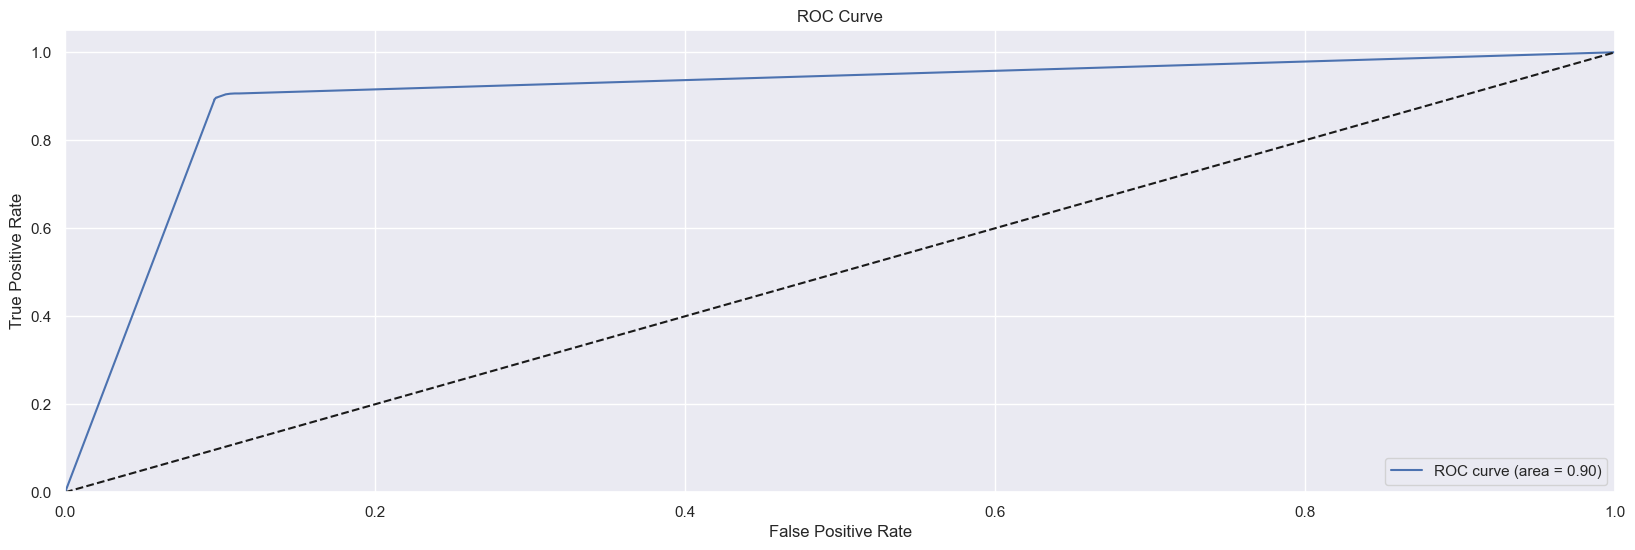

In [81]:
auc_roc_check(clf, X_test, y_test)

In [82]:
cross_val(clf, X, y, cv_size=5)

Cross-Validation Accuracy Scores: [0.89271217 0.89051136 0.89353705 0.90947361 0.88771119]
Average Cross-Validation Accuracy: 0.8947890747696146


In [83]:
check_over_underfitting(y_train, clf, X_train, y_test, y_pred)

Training Accuracy: 0.993049082398693
Test Accuracy: 0.8996451874793276


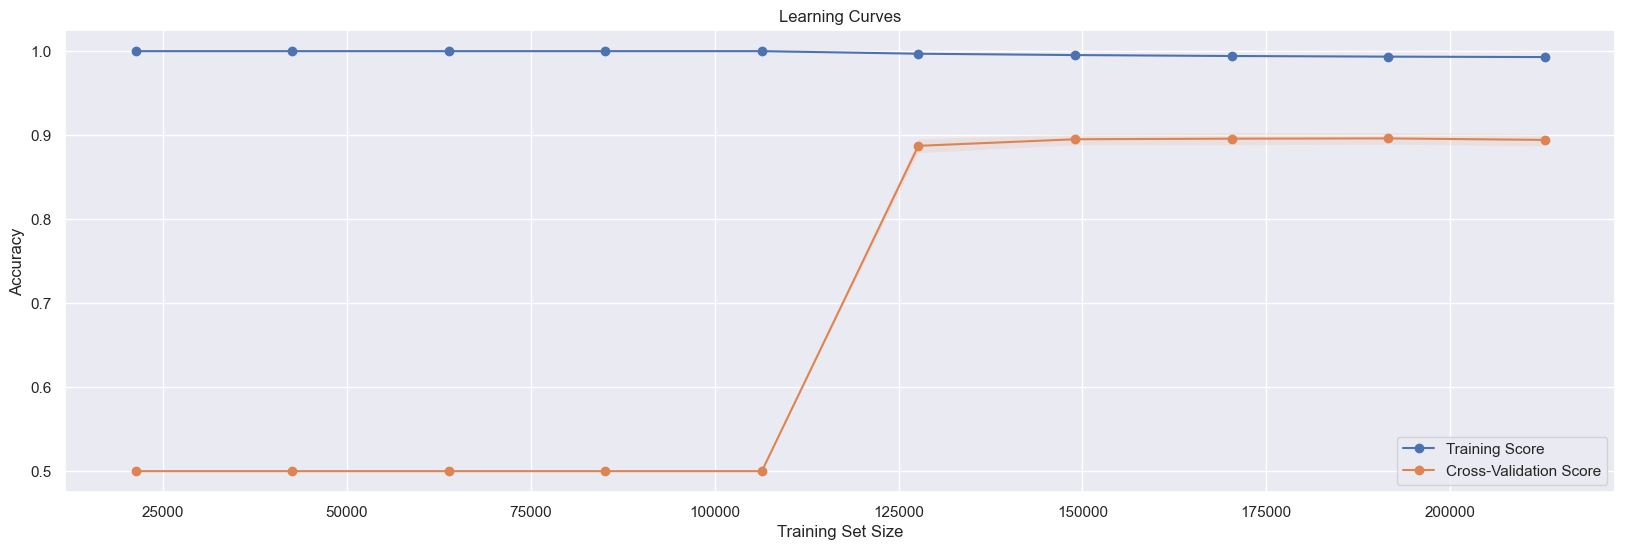

In [84]:
learning_curve_check(clf, X, y, cv_size=5, n_jobs_size=1)

# Hyperparameter Tuning with adjusted dataframe

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy']
}

# Initialize the model
clf = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', 
                                   n_jobs=-1, verbose=1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best estimator
best_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [99]:
tree_model_random = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 4, min_samples_split= 10,random_state=42)
tree_model_random.fit(X_train, y_train)

# Predictions and evaluation
y_pred_tree_random = tree_model_random.predict(X_test)

# Validation
validation(y_pred_tree_random, y_test)

Confusion Matrix :
 [[30231  3026]
 [ 1665 31592]]
Accuracy Score : 0.9294734943019515
Report : 
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     33257
           1       0.91      0.95      0.93     33257

    accuracy                           0.93     66514
   macro avg       0.93      0.93      0.93     66514
weighted avg       0.93      0.93      0.93     66514



In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [109]:
# Train a Decision Tree Classifier GRID
tree_model_grid = DecisionTreeClassifier(criterion= 'entropy', max_depth= 2, min_samples_leaf= 15, min_samples_split= 15, random_state=42)
tree_model_grid.fit(X_train, y_train)

# Predictions and evaluation
y_pred_tree_grid = tree_model_grid.predict(X_test)

# Validation
validation(y_pred_tree_grid, y_test)

Confusion Matrix :
 [[24897  8360]
 [ 2036 31221]]
Accuracy Score : 0.8437020777580659
Report : 
              precision    recall  f1-score   support

           0       0.92      0.75      0.83     33257
           1       0.79      0.94      0.86     33257

    accuracy                           0.84     66514
   macro avg       0.86      0.84      0.84     66514
weighted avg       0.86      0.84      0.84     66514



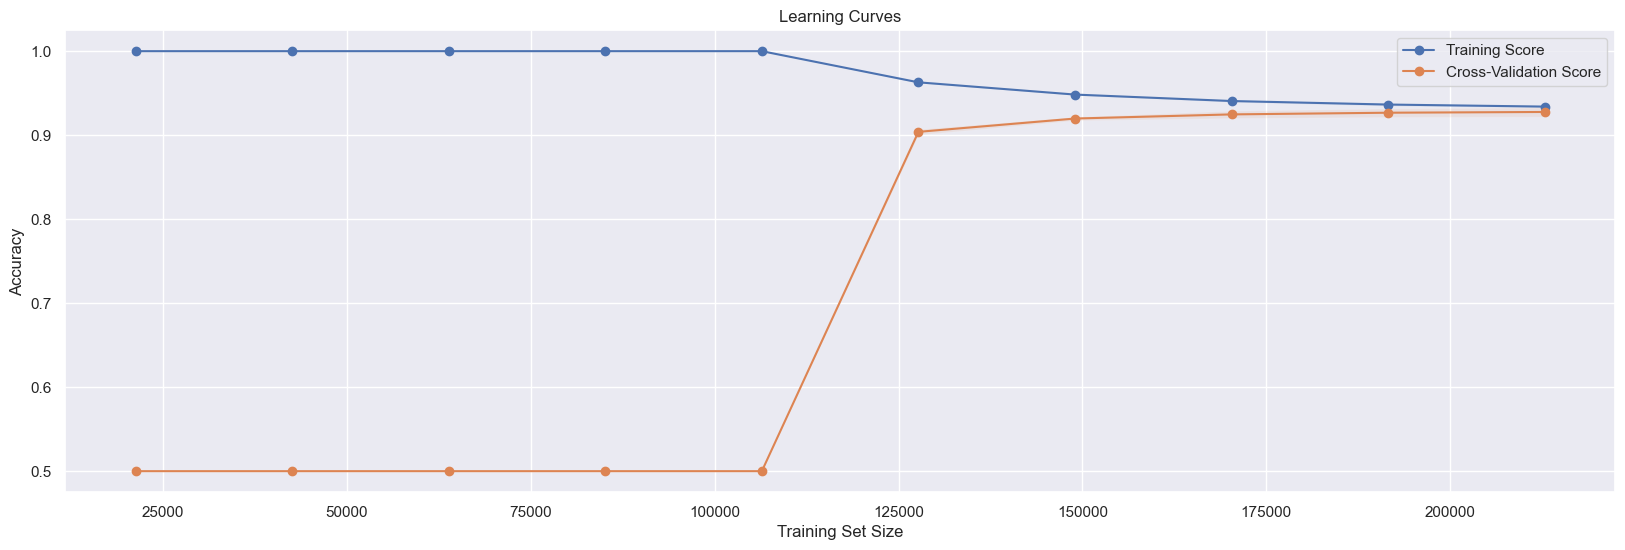

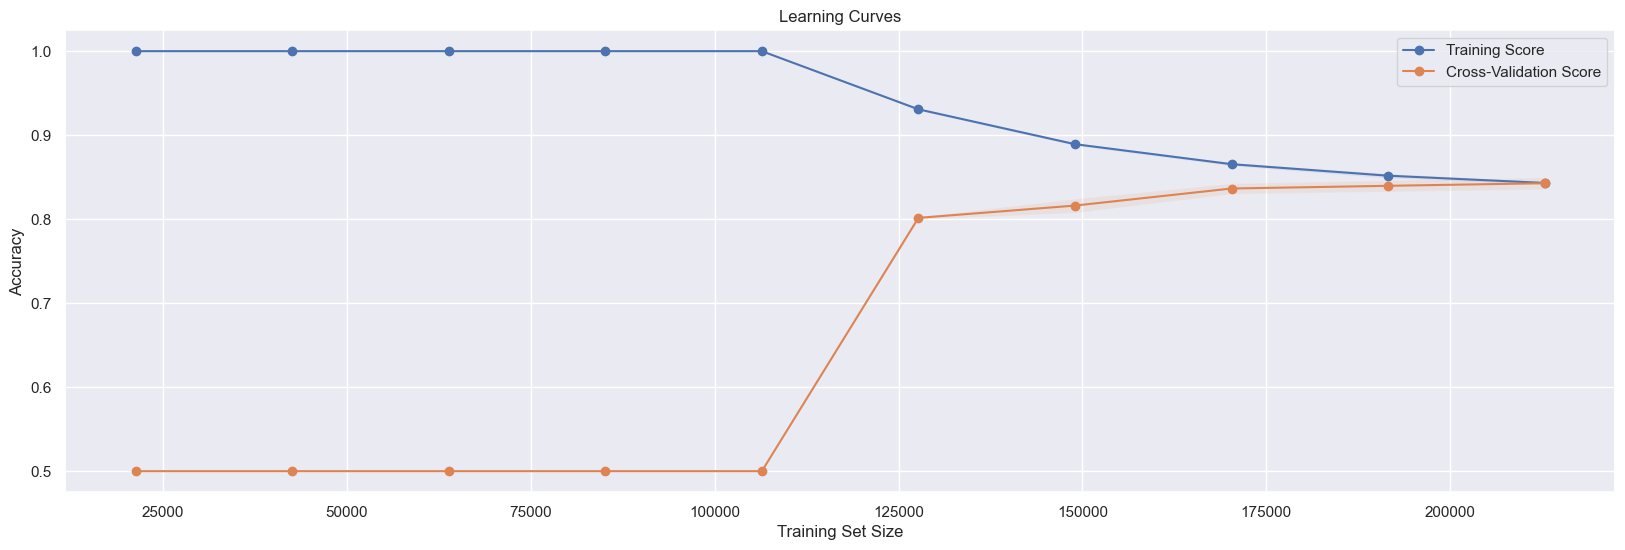

In [110]:
learning_curve_check(tree_model_random, X,y)
learning_curve_check(tree_model_grid,X,y)

The Decision Tree Model is showing that it's overfitting. After different hyperparameter tuning the learning curve didn't change. It starts at 0.5 and improving to 0.85. But the gap is huge in the beginning which leads to an indicator of overfitting. 

Confusion Matrix :
 [[30464  2793]
 [ 2241 31016]]
Accuracy Score : 0.9243166852091289
Report : 
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     33257
           1       0.92      0.93      0.92     33257

    accuracy                           0.92     66514
   macro avg       0.92      0.92      0.92     66514
weighted avg       0.92      0.92      0.92     66514



/Users/linhle/.pyenv/versions/3.11.3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


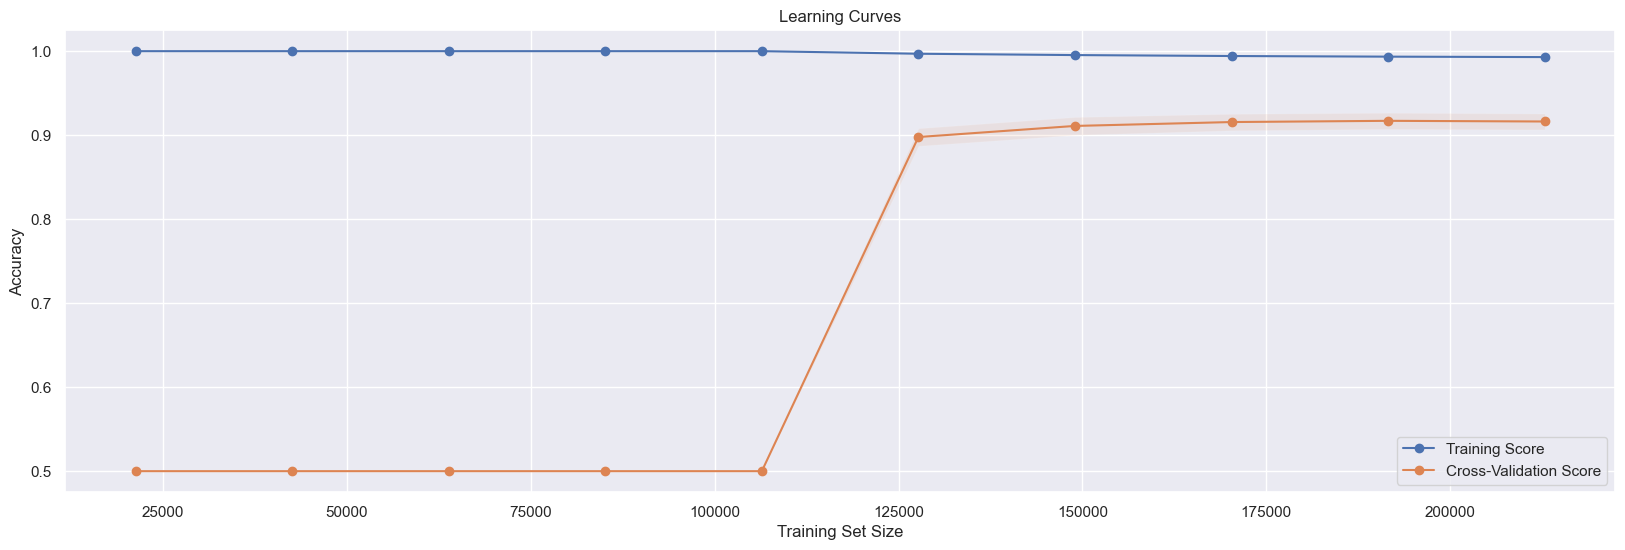

In [111]:
# Random Forest
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

validation(y_pred_rf, y_test)
learning_curve_check(rf_model, X, y)


In [ ]:
# same result like Decision Tree